In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [2]:
pop = pd.read_csv('world_ind_pop_data.csv')
pop.head()

,CountryName,CountryCode,Year,Total Population,Urban population (% of total)
0,Arab World,ARB,1960,9.249590e+07,31.285384
1,Caribbean small states,CSS,1960,4.190810e+06,31.597490
2,Central Europe and the Baltics,CEB,1960,9.140158e+07,44.507921
3,East Asia & Pacific (all income levels),EAS,1960,1.042475e+09,22.471132
4,East Asia & Pacific (developing only),EAP,1960,8.964930e+08,16.917679


In [3]:
pop.tail()

,CountryName,CountryCode,Year,Total Population,Urban population (% of total)
13369,Virgin Islands (U.S.),VIR,2014,104170.0,95.203
13370,West Bank and Gaza,WBG,2014,4294682.0,75.026
13371,"Yemen, Rep.",YEM,2014,26183676.0,34.027
13372,Zambia,ZMB,2014,15721343.0,40.472
13373,Zimbabwe,ZWE,2014,15245855.0,32.501


In [4]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13374 entries, 0 to 13373
Data columns (total 5 columns):
CountryName                      13374 non-null object
CountryCode                      13374 non-null object
Year                             13374 non-null int64
Total Population                 13374 non-null float64
Urban population (% of total)    13374 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 522.5+ KB


In [5]:
np.log10(pop['Total Population'])

0        7.966122
1        6.622298
2        7.960954
3        9.018066
4        8.952547
           ...   
13369    5.017743
13370    6.632931
13371    7.418031
13372    7.196490
13373    7.183152
Name: Total Population, Length: 13374, dtype: float64

In [6]:
keys = ['Country', 'Total']
values = [['United States', 'Soviet Union', 'United Kingdom'], [1118, 473, 273]]
dict(zip(keys, values))

{'Country': ['United States', 'Soviet Union', 'United Kingdom'],
 'Total': [1118, 473, 273]}

In [7]:
pd.DataFrame(dict(zip(keys, values)))

,Country,Total
0,United States,1118
1,Soviet Union,473
2,United Kingdom,273


In [8]:
cities = ['Manheim', 'Preston park', 'Biglerville', 'Indiana', 'Curwensville', 'Crown', 'Harveys lake', 'Mineral springs', 'Cassville', 'Hannastown', 'Saltsburg', 'Tunkhannock', 'Pittsburgh', 'Lemasters', 'Great bend']
pd.DataFrame({'state': 'PA', 'city': cities})

,state,city
0,PA,Manheim
1,PA,Preston park
2,PA,Biglerville
3,PA,Indiana
4,PA,Curwensville
5,PA,Crown
6,PA,Harveys lake
7,PA,Mineral springs
8,PA,Cassville
9,PA,Hannastown


In [9]:
world = pd.read_csv('world_population.csv')
world

,Year,Total Population
0,1960,3.034971e+09
1,1970,3.684823e+09
2,1980,4.436590e+09
3,1990,5.282716e+09
4,2000,6.115974e+09
5,2010,6.924283e+09


In [10]:
stock = pd.read_csv('messy_stock_data.tsv', delimiter=' ', header=3, comment='#')
stock.head()

,name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,IBM,156.08,160.01,159.81,165.22,172.25,167.15,164.75,152.77,145.36,146.11,137.21,137.96
1,MSFT,45.51,43.08,42.13,43.47,47.53,45.96,45.61,45.51,43.56,48.70,53.88,55.40
2,GOOGLE,512.42,537.99,559.72,540.50,535.24,532.92,590.09,636.84,617.93,663.59,735.39,755.35
3,APPLE,110.64,125.43,125.97,127.29,128.76,127.81,125.34,113.39,112.80,113.36,118.16,111.73


In [11]:
weather = pd.read_csv('weather_data_austin_2010.csv')
weather.head()

,Temperature,DewPoint,Pressure,Date
0,46.2,37.5,1.0,20100101 00:00
1,44.6,37.1,1.0,20100101 01:00
2,44.1,36.9,1.0,20100101 02:00
3,43.8,36.9,1.0,20100101 03:00
4,43.5,36.8,1.0,20100101 04:00


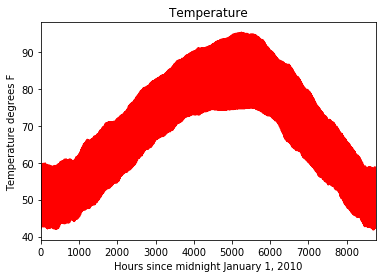

In [12]:
weather['Temperature'].plot(color='red')
plt.title('Temperature')
plt.xlabel('Hours since midnight January 1, 2010')
plt.ylabel('Temperature degrees F')
plt.show()

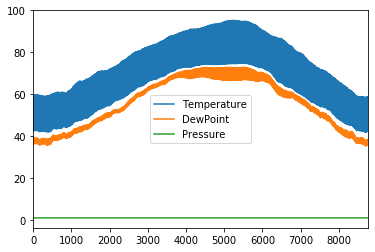

In [13]:
weather.plot()
plt.show()

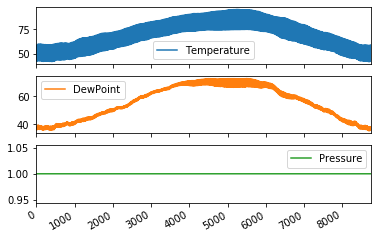

In [14]:
weather.plot(subplots=True)
plt.show()

In [15]:
stock.set_index('name', inplace=True)

In [16]:
stock_t = stock.T
stock_t

name,IBM,MSFT,GOOGLE,APPLE
Jan,156.08,45.51,512.42,110.64
Feb,160.01,43.08,537.99,125.43
Mar,159.81,42.13,559.72,125.97
Apr,165.22,43.47,540.50,127.29
May,172.25,47.53,535.24,128.76
Jun,167.15,45.96,532.92,127.81
Jul,164.75,45.61,590.09,125.34
Aug,152.77,45.51,636.84,113.39
Sep,145.36,43.56,617.93,112.80
Oct,146.11,48.70,663.59,113.36


In [17]:
stock_t.index.name = 'month'

In [18]:
stock_t.reset_index(inplace=True)

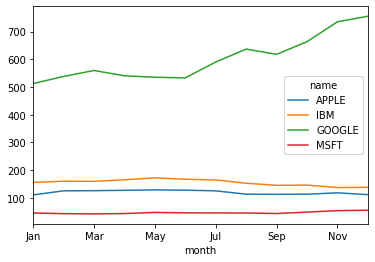

In [19]:
stock_t.plot(x='month', y=['APPLE', 'IBM', 'GOOGLE', 'MSFT'])
plt.show()

In [20]:
auto = pd.read_csv('auto-mpg.csv')
auto.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,US,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,US,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,US,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,US,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,US,ford torino


In [21]:
sizes = (auto.weight - min(auto.weight))/(max(auto.weight) - min(auto.weight))

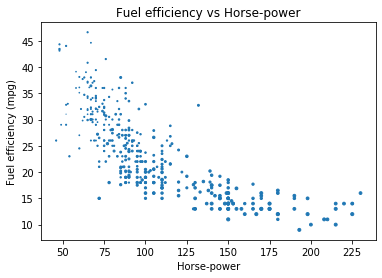

In [22]:
auto.plot(kind="scatter", x="hp", y="mpg", s=sizes*10)
plt.title("Fuel efficiency vs Horse-power")
plt.xlabel("Horse-power")
plt.ylabel("Fuel efficiency (mpg)")
plt.show()

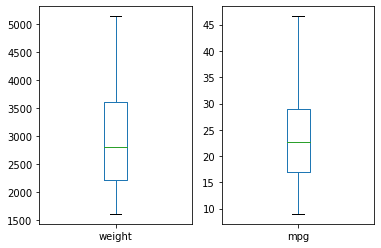

In [23]:
auto[['weight', 'mpg']].plot(kind='box', subplots=True)
plt.show()

In [24]:
tips = pd.read_csv('tips.csv')

/Users/joymonnok/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


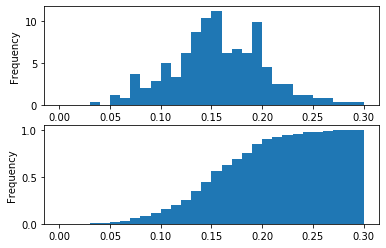

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=1)
tips.fraction.plot(ax=axes[0], kind='hist', normed=True, bins=30, range=(0, .3))
tips.fraction.plot(ax=axes[1], kind='hist', normed=True, bins=30, range=(0, .3), cumulative=True)
plt.show()

In [26]:
auto['mpg'].describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

In [27]:
bachelors = pd.read_csv('percent-bachelors-degrees-women-usa.csv', index_col='Year')
bachelors.head()

,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
Year,,,,,,,,,,,,,,,,,
1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


In [28]:
bachelors.min()

Agriculture                       4.229798
Architecture                     11.921005
Art and Performance              58.600000
Biology                          29.088363
Business                          9.064439
Communications and Journalism    35.300000
Computer Science                 13.600000
Education                        72.166525
Engineering                       0.800000
English                          61.647206
Foreign Languages                69.000000
Health Professions               75.500000
Math and Statistics              38.000000
Physical Sciences                13.800000
Psychology                       44.400000
Public Administration            62.600000
Social Sciences and History      36.100000
dtype: float64

In [29]:
bachelors.max()

Agriculture                      50.037182
Architecture                     44.499331
Art and Performance              63.400000
Biology                          62.169456
Business                         50.552335
Communications and Journalism    64.600000
Computer Science                 37.100000
Education                        79.618625
Engineering                      19.000000
English                          68.894487
Foreign Languages                75.300000
Health Professions               86.500000
Math and Statistics              48.300000
Physical Sciences                42.200000
Psychology                       77.800000
Public Administration            82.100000
Social Sciences and History      51.800000
dtype: float64

In [30]:
bachelors.mean(axis=1)

Year
1970    38.594697
1971    38.603481
1972    39.066075
1973    40.131826
1974    41.715916
1975    42.373672
1976    44.015581
1977    45.673823
1978    47.308670
1979    48.811798
1980    49.980583
1981    50.974090
1982    52.009448
1983    52.187399
1984    52.474007
1985    52.399548
1986    52.752830
1987    53.169798
1988    53.130635
1989    53.305542
1990    53.737364
1991    53.471622
1992    53.262399
1993    53.199202
1994    53.238427
1995    53.508401
1996    53.941559
1997    54.446953
1998    55.227195
1999    55.971538
2000    56.501939
2001    56.946913
2002    57.181722
2003    57.367542
2004    57.019094
2005    56.723782
2006    56.262194
2007    56.053781
2008    55.903924
2009    56.026406
2010    55.883043
2011    55.999587
dtype: float64

In [31]:
bachelors.mean(axis=0)

Agriculture                      33.848165
Architecture                     33.685540
Art and Performance              61.100000
Biology                          49.429864
Business                         40.653471
Communications and Journalism    56.216667
Computer Science                 25.809524
Education                        76.356236
Engineering                      12.892857
English                          66.186680
Foreign Languages                71.723810
Health Professions               82.983333
Math and Statistics              44.478571
Physical Sciences                31.304762
Psychology                       68.776190
Public Administration            76.085714
Social Sciences and History      45.407143
dtype: float64

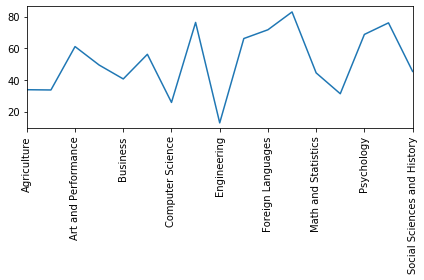

In [32]:
bachelors.mean().plot(rot=90)
plt.tight_layout()

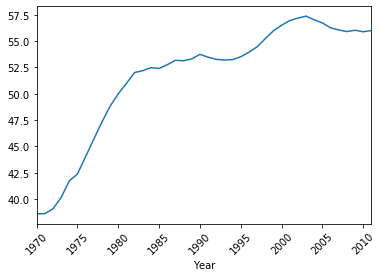

In [33]:
bachelors.mean(axis=1).plot(rot=45)

In [96]:
life = pd.read_csv('life_expectancy_at_birth.csv', index_col=0)
life.head(10)

,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50
5,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,72.4,72.7,71.3,72.8,72.6,72.6,72.7,72.8,72.9,73.00
6,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,84.5,84.6,84.6,84.7,84.7,84.7,84.8,84.8,84.8,84.80
7,Angola,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,...,56.2,56.7,57.1,57.6,58.1,58.5,58.8,59.2,59.6,60.00
8,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Antigua and Barbuda,33.54,33.54,33.54,33.54,33.54,33.54,33.54,33.54,33.54,...,75.3,75.5,75.7,75.8,75.9,76.1,76.2,76.3,76.4,76.50


In [97]:
life['2015'].count()

208

In [98]:
life.quantile([0.05, 0.95])

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0.05,25.40,25.30,25.20,25.2,25.2,25.40,25.40,25.40,25.3,25.3,...,53.07,53.60,54.235,54.935,55.97,56.335,56.705,56.87,57.855,59.2555
0.95,37.92,37.35,38.37,38.0,38.3,38.37,38.37,38.37,38.0,38.0,...,80.73,80.93,81.200,81.365,81.60,81.665,81.830,82.00,82.100,82.1650


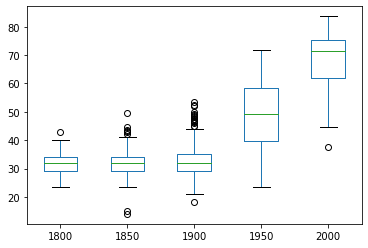

In [99]:
years = ['1800', '1850', '1900', '1950', '2000']
life[years].plot(kind='box');

In [100]:
weather.head(10)

,Temperature,DewPoint,Pressure,Date
0,46.2,37.5,1.0,20100101 00:00
1,44.6,37.1,1.0,20100101 01:00
2,44.1,36.9,1.0,20100101 02:00
3,43.8,36.9,1.0,20100101 03:00
4,43.5,36.8,1.0,20100101 04:00
5,43.0,36.5,1.0,20100101 05:00
6,43.1,36.3,1.0,20100101 06:00
7,42.3,35.9,1.0,20100101 07:00
8,42.5,36.2,1.0,20100101 08:00
9,45.9,37.8,1.0,20100101 09:00


In [101]:
weather.mean()

Temperature    68.077258
DewPoint       55.939057
Pressure        1.000000
dtype: float64

In [102]:
weather.std()

Temperature    13.773378
DewPoint       11.757706
Pressure        0.000000
dtype: float64

In [103]:
auto.head(10)

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,US,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,US,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,US,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,US,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,US,ford torino
5,15.0,8,429.0,198,4341,10.0,70,US,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,US,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,US,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,US,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,US,amc ambassador dpl


In [104]:
auto.mean()

mpg         23.445918
cyl          5.471939
displ      194.411990
hp         104.469388
weight    2977.584184
accel       15.541327
yr          75.979592
dtype: float64

In [105]:
auto.std()

mpg         7.805007
cyl         1.705783
displ     104.644004
hp         38.491160
weight    849.402560
accel       2.758864
yr          3.683737
dtype: float64

In [106]:
us = auto[auto['origin'] == 'US']
us.mean()

mpg         20.033469
cyl          6.277551
displ      247.512245
hp         119.048980
weight    3372.489796
accel       14.990204
yr          75.591837
dtype: float64

In [107]:
us.std()

mpg         6.440384
cyl         1.655996
displ      98.376347
hp         39.897790
weight    795.346690
accel       2.736020
yr          3.660368
dtype: float64

In [108]:
us.mean() - auto.mean()

mpg        -3.412449
cyl         0.805612
displ      53.100255
hp         14.579592
weight    394.905612
accel      -0.551122
yr         -0.387755
dtype: float64

In [109]:
us.std() - auto.std()

mpg       -1.364623
cyl       -0.049788
displ     -6.267657
hp         1.406630
weight   -54.055870
accel     -0.022844
yr        -0.023369
dtype: float64

In [111]:
titanic = pd.read_csv('titanic.csv')
titanic.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.00,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


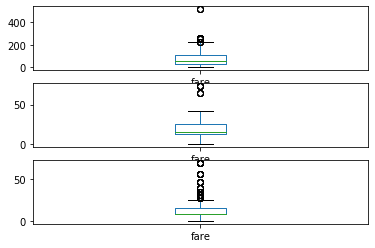

In [118]:
fig, axes = plt.subplots(nrows=3, ncols=1)
titanic.loc[titanic['pclass'] == 1].plot(ax=axes[0], y='fare', kind='box')
titanic.loc[titanic['pclass'] == 2].plot(ax=axes[1], y='fare', kind='box')
titanic.loc[titanic['pclass'] == 3].plot(ax=axes[2], y='fare', kind='box');

In [120]:
time_format = "%Y%m%d %H:%M"
weather["Date"] = pd.to_datetime(weather["Date"], format=time_format)
weather.set_index("Date", inplace=True)
weather.head(10)

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01 00:00:00,46.2,37.5,1.0
2010-01-01 01:00:00,44.6,37.1,1.0
2010-01-01 02:00:00,44.1,36.9,1.0
2010-01-01 03:00:00,43.8,36.9,1.0
2010-01-01 04:00:00,43.5,36.8,1.0
2010-01-01 05:00:00,43.0,36.5,1.0
2010-01-01 06:00:00,43.1,36.3,1.0
2010-01-01 07:00:00,42.3,35.9,1.0
2010-01-01 08:00:00,42.5,36.2,1.0


In [122]:
weather.tail(10)

,Temperature,DewPoint,Pressure
Date,,,
2010-12-31 14:00:00,58.2,37.9,1.0
2010-12-31 15:00:00,58.8,37.9,1.0
2010-12-31 16:00:00,58.8,37.9,1.0
2010-12-31 17:00:00,57.6,38.2,1.0
2010-12-31 18:00:00,54.3,37.8,1.0
2010-12-31 19:00:00,51.1,38.1,1.0
2010-12-31 20:00:00,49.0,37.9,1.0
2010-12-31 21:00:00,47.9,37.9,1.0
2010-12-31 22:00:00,46.9,37.9,1.0


In [128]:
weather.loc["2010-01-01 21:00:00":"2010-01-01 22:00:00"]

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01 21:00:00,48.1,38.5,1.0
2010-01-01 22:00:00,47.2,38.5,1.0


In [130]:
weather["Temperature"].resample("6h").mean()

Date
2010-01-01 00:00:00    44.200000
2010-01-01 06:00:00    45.933333
2010-01-01 12:00:00    57.766667
2010-01-01 18:00:00    49.450000
2010-01-02 00:00:00    44.516667
                         ...    
2010-12-30 18:00:00    49.150000
2010-12-31 00:00:00    44.133333
2010-12-31 06:00:00    45.916667
2010-12-31 12:00:00    57.500000
2010-12-31 18:00:00    49.233333
Freq: 6H, Name: Temperature, Length: 1460, dtype: float64

In [131]:
weather["Temperature"].resample("D").count()

Date
2010-01-01    24
2010-01-02    24
2010-01-03    24
2010-01-04    24
2010-01-05    24
              ..
2010-12-27    24
2010-12-28    24
2010-12-29    24
2010-12-30    24
2010-12-31    24
Freq: D, Name: Temperature, Length: 365, dtype: int64

In [132]:
august = weather.loc["2010-08", "Temperature"]
august.resample("D").max()

Date
2010-08-01    95.0
2010-08-02    95.0
2010-08-03    95.1
2010-08-04    95.1
2010-08-05    95.1
2010-08-06    95.2
2010-08-07    95.3
2010-08-08    95.2
2010-08-09    95.2
2010-08-10    95.1
2010-08-11    95.0
2010-08-12    94.9
2010-08-13    95.0
2010-08-14    94.9
2010-08-15    94.7
2010-08-16    94.7
2010-08-17    94.8
2010-08-18    94.8
2010-08-19    94.8
2010-08-20    94.8
2010-08-21    94.7
2010-08-22    94.6
2010-08-23    94.5
2010-08-24    94.3
2010-08-25    94.1
2010-08-26    94.0
2010-08-27    93.7
2010-08-28    93.5
2010-08-29    93.3
2010-08-30    93.3
2010-08-31    93.1
Freq: D, Name: Temperature, dtype: float64

In [133]:
february = weather.loc["2010-02", "Temperature"]
february.resample("D").min()

Date
2010-02-01    43.8
2010-02-02    44.3
2010-02-03    44.6
2010-02-04    44.5
2010-02-05    44.3
2010-02-06    44.1
2010-02-07    44.3
2010-02-08    44.7
2010-02-09    44.7
2010-02-10    44.9
2010-02-11    45.2
2010-02-12    45.5
2010-02-13    46.0
2010-02-14    46.6
2010-02-15    46.9
2010-02-16    47.1
2010-02-17    47.2
2010-02-18    47.2
2010-02-19    47.4
2010-02-20    47.7
2010-02-21    47.6
2010-02-22    47.7
2010-02-23    47.7
2010-02-24    48.1
2010-02-25    48.4
2010-02-26    48.5
2010-02-27    48.6
2010-02-28    48.6
Freq: D, Name: Temperature, dtype: float64

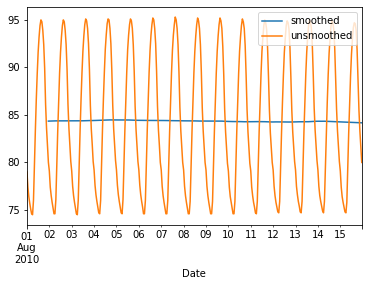

In [134]:
unsmoothed = weather["Temperature"]["2010-08-01":"2010-08-15"]
smoothed = unsmoothed.rolling(window=24).mean()
august = pd.DataFrame({'smoothed': smoothed, 'unsmoothed': unsmoothed})
august.plot();

In [135]:
august = weather.loc["2010-08", "Temperature"]
daily_highs = august.resample("D").max()
daily_highs.rolling(window=7).mean()

Date
2010-08-01          NaN
2010-08-02          NaN
2010-08-03          NaN
2010-08-04          NaN
2010-08-05          NaN
2010-08-06          NaN
2010-08-07    95.114286
2010-08-08    95.142857
2010-08-09    95.171429
2010-08-10    95.171429
2010-08-11    95.157143
2010-08-12    95.128571
2010-08-13    95.100000
2010-08-14    95.042857
2010-08-15    94.971429
2010-08-16    94.900000
2010-08-17    94.857143
2010-08-18    94.828571
2010-08-19    94.814286
2010-08-20    94.785714
2010-08-21    94.757143
2010-08-22    94.742857
2010-08-23    94.714286
2010-08-24    94.642857
2010-08-25    94.542857
2010-08-26    94.428571
2010-08-27    94.271429
2010-08-28    94.100000
2010-08-29    93.914286
2010-08-30    93.742857
2010-08-31    93.571429
Freq: D, Name: Temperature, dtype: float64

In [150]:
airport = pd.read_csv("austin_airport_departure_data_2015_july.csv", skiprows=14, parse_dates=[1], index_col=1)
airport = airport.drop(airport.columns[-1], axis=1)
airport.head(10)

,Carrier Code,Flight Number,Tail Number,Destination Airport,Scheduled Departure Time,Actual Departure Time,Scheduled Elapsed Time(Minutes),Actual Elapsed Time(Minutes),Departure Delay(Minutes),Wheels-off Time,Taxi-out Time(Minutes),DelayCarrier(Minutes),DelayWeather(Minutes),DelayNational Aviation System(Minutes),DelaySecurity(Minutes),DelayLate Aircraft Arrival(Minutes)
Date (MM/DD/YYYY),,,,,,,,,,,,,,,,
2015-07-01,WN,103.0,N8607M,MDW,06:30,06:52,165.0,147.0,22.0,07:01,9.0,0.0,0.0,0.0,0.0,0.0
2015-07-01,WN,144.0,N8609A,SAN,20:55,20:50,170.0,158.0,-5.0,21:03,13.0,0.0,0.0,0.0,0.0,0.0
2015-07-01,WN,178.0,N646SW,ELP,20:30,20:45,90.0,80.0,15.0,20:55,10.0,0.0,0.0,0.0,0.0,0.0
2015-07-01,WN,232.0,N204WN,ATL,05:45,05:49,135.0,137.0,4.0,06:01,12.0,0.0,0.0,0.0,0.0,0.0
2015-07-01,WN,238.0,N233LV,DAL,12:30,12:34,55.0,48.0,4.0,12:41,7.0,0.0,0.0,0.0,0.0,0.0
2015-07-01,WN,285.0,N526SW,DAL,09:25,09:20,55.0,51.0,-5.0,09:27,7.0,0.0,0.0,0.0,0.0,0.0
2015-07-01,WN,311.0,N734SA,MDW,15:05,15:49,150.0,146.0,44.0,15:57,8.0,6.0,0.0,0.0,0.0,34.0
2015-07-01,WN,329.0,N526SW,HOU,16:00,18:07,50.0,53.0,127.0,18:18,11.0,0.0,0.0,3.0,0.0,127.0
2015-07-01,WN,341.0,N297WN,OAK,18:00,18:30,225.0,211.0,30.0,18:46,16.0,0.0,0.0,0.0,0.0,16.0


In [151]:
airport.columns = airport.columns.str.strip()
airport.columns

Index(['Carrier Code', 'Flight Number', 'Tail Number', 'Destination Airport',
       'Scheduled Departure Time', 'Actual Departure Time',
       'Scheduled Elapsed Time(Minutes)', 'Actual Elapsed Time(Minutes)',
       'Departure Delay(Minutes)', 'Wheels-off Time', 'Taxi-out Time(Minutes)',
       'DelayCarrier(Minutes)', 'DelayWeather(Minutes)',
       'DelayNational Aviation System(Minutes)', 'DelaySecurity(Minutes)',
       'DelayLate Aircraft Arrival(Minutes)'],
      dtype='object')

In [154]:
airport.shape

(1741, 16)

In [157]:
dallas = airport.loc[airport["Destination Airport"].str.contains("DAL", na=False)]
dallas.resample("D").sum()

,Flight Number,Scheduled Elapsed Time(Minutes),Actual Elapsed Time(Minutes),Departure Delay(Minutes),Taxi-out Time(Minutes),DelayCarrier(Minutes),DelayWeather(Minutes),DelayNational Aviation System(Minutes),DelaySecurity(Minutes),DelayLate Aircraft Arrival(Minutes)
Date (MM/DD/YYYY),,,,,,,,,,
2015-07-01,18893.0,565.0,492.0,153.0,92.0,8.0,0.0,18.0,0.0,117.0
2015-07-02,18893.0,565.0,537.0,322.0,92.0,9.0,0.0,3.0,0.0,313.0
2015-07-03,17143.0,615.0,581.0,140.0,100.0,7.0,0.0,0.0,0.0,118.0
2015-07-04,1619.0,165.0,162.0,7.0,30.0,13.0,0.0,3.0,0.0,0.0
2015-07-05,19192.0,505.0,470.0,51.0,85.0,8.0,0.0,7.0,0.0,0.0
2015-07-06,18893.0,565.0,528.0,29.0,89.0,0.0,0.0,2.0,0.0,13.0
2015-07-07,18893.0,565.0,469.0,106.0,87.0,0.0,0.0,0.0,0.0,93.0
2015-07-08,18893.0,565.0,533.0,128.0,106.0,46.0,0.0,60.0,0.0,0.0
2015-07-09,18893.0,565.0,535.0,1.0,86.0,0.0,0.0,0.0,0.0,0.0


In [165]:
mask = airport["Destination Airport"] == 'LAX'
la = airport[mask].reset_index()
times_tz_none = pd.to_datetime(la["Date (MM/DD/YYYY)"].astype(str) + " " + la["Wheels-off Time"])
times_tz_none

0    2015-07-01 05:43:00
1    2015-07-01 16:27:00
2    2015-07-02 05:47:00
3    2015-07-02 16:23:00
4    2015-07-03 05:30:00
             ...        
57   2015-07-29 16:29:00
58   2015-07-30 05:36:00
59   2015-07-30 16:41:00
60   2015-07-31 05:39:00
61   2015-07-31 17:04:00
Length: 62, dtype: datetime64[ns]

In [166]:
times_tz_none.dt.tz_localize("US/Central")

0    2015-07-01 05:43:00-05:00
1    2015-07-01 16:27:00-05:00
2    2015-07-02 05:47:00-05:00
3    2015-07-02 16:23:00-05:00
4    2015-07-03 05:30:00-05:00
                ...           
57   2015-07-29 16:29:00-05:00
58   2015-07-30 05:36:00-05:00
59   2015-07-30 16:41:00-05:00
60   2015-07-31 05:39:00-05:00
61   2015-07-31 17:04:00-05:00
Length: 62, dtype: datetime64[ns, US/Central]

In [141]:
titanic_train = pd.read_csv('train.csv')
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
titanic_test = pd.read_csv('test.csv')
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [36]:
titanic_train.shape

(891, 12)

In [37]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [38]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [39]:
titanic_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [40]:
total = titanic_train.isnull().sum().sort_values(ascending=False)
percent_1 = titanic_train.isnull().sum()/titanic_train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0


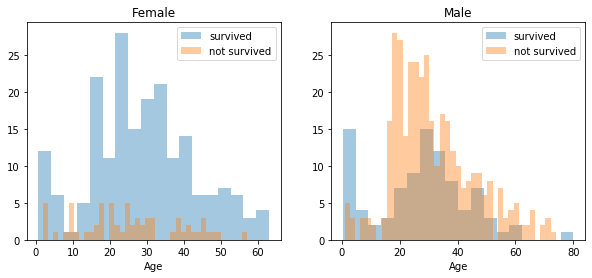

In [41]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
women = titanic_train[titanic_train['Sex']=='female']
men = titanic_train[titanic_train['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label=survived, ax=axes[0], kde=False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label=not_survived, ax=axes[0], kde=False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label=survived, ax=axes[1], kde=False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label=not_survived, ax=axes[1], kde=False)
ax.legend()
_ = ax.set_title('Male')

/Users/joymonnok/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


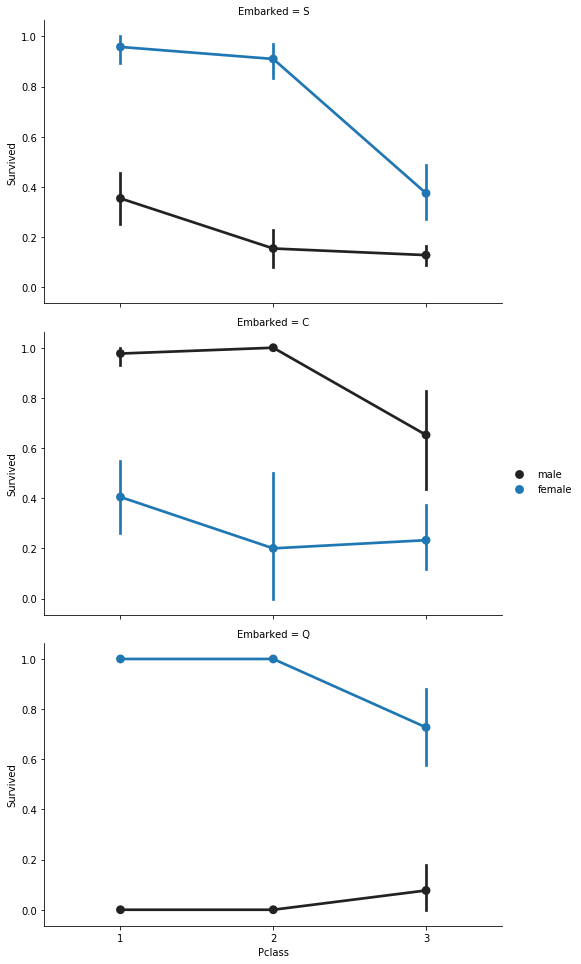

In [42]:
FacetGrid = sns.FacetGrid(titanic_train, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None, order=None, hue_order=None)
_ = FacetGrid.add_legend()

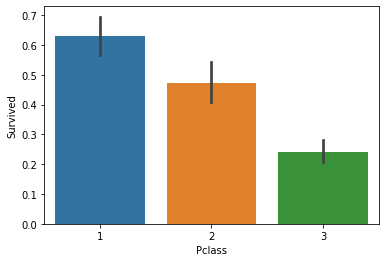

In [43]:
_ = sns.barplot(x='Pclass', y='Survived', data=titanic_train)

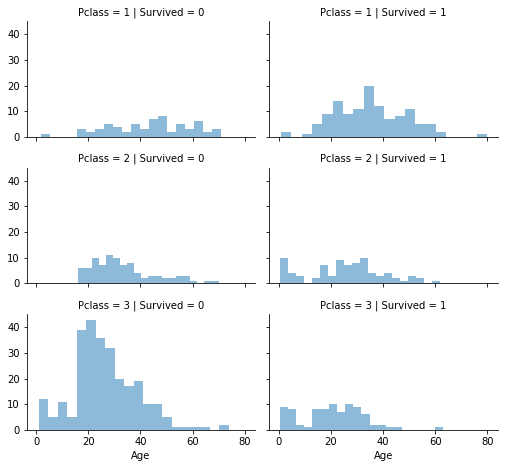

In [44]:
grid = sns.FacetGrid(titanic_train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
grid.add_legend();

In [45]:
data = [titanic_train, titanic_test]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
    
titanic_train['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

/Users/joymonnok/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


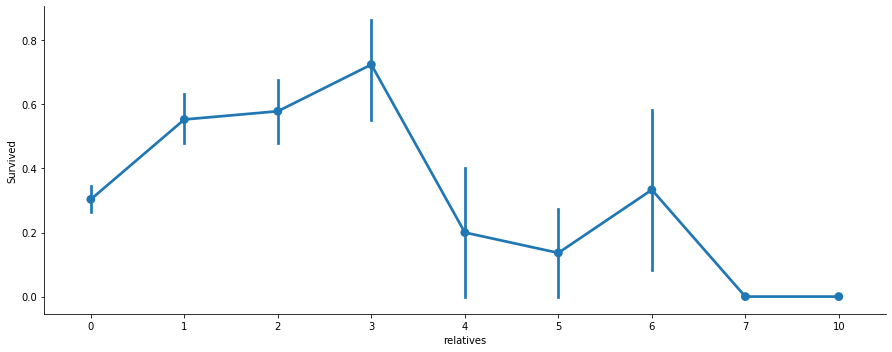

In [46]:
axes = sns.factorplot('relatives', 'Survived', data=titanic_train, aspect = 2.5,)

In [47]:
titanic_train = titanic_train.drop(['PassengerId'], axis=1)

In [48]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [titanic_train, titanic_test]
for dataset in data:
    dataset["Cabin"] = dataset["Cabin"].fillna("U0")
    dataset["Deck"] = dataset["Cabin"].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset["Deck"] = dataset["Deck"].map(deck)
    dataset["Deck"] = dataset["Deck"].fillna(0)
    dataset["Deck"] = dataset["Deck"].astype(int)
    
# we can now drop the cabin feature
titanic_train = titanic_train.drop(["Cabin"], axis=1)
titanic_test = titanic_test.drop(["Cabin"], axis=1)

In [49]:
data = [titanic_train, titanic_test]
for dataset in data:
    mean = titanic_train["Age"].mean()
    std = titanic_train["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    rand_age = np.random.randint(mean - std, mean + std, size=is_null)
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = dataset["Age"].astype(int)
    
titanic_train["Age"].isnull().sum()

0

In [50]:
titanic_train["Embarked"].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [51]:
common_value = 'S'
data = [titanic_train, titanic_test]
for dataset in data:
    dataset["Embarked"] = dataset["Embarked"].fillna(common_value)

In [52]:
titanic_train["Embarked"].describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

In [53]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Name         891 non-null object
Sex          891 non-null object
Age          891 non-null int64
SibSp        891 non-null int64
Parch        891 non-null int64
Ticket       891 non-null object
Fare         891 non-null float64
Embarked     891 non-null object
relatives    891 non-null int64
not_alone    891 non-null int64
Deck         891 non-null int64
dtypes: float64(1), int64(8), object(4)
memory usage: 90.6+ KB


In [54]:
data = [titanic_train, titanic_test]
for dataset in data:
    dataset["Fare"] = dataset["Fare"].fillna(0)
    dataset["Fare"] = dataset["Fare"].astype(int)

In [55]:
data = [titanic_train, titanic_test]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in data:
    dataset["Title"] = dataset.Name.str.extract(" ([A-Za-z]+)\.", expand=False)
    dataset["Title"] = dataset["Title"].replace(["Lady", "Countess", "Capt", "Col", "Don", "Dr", 
                                                 "Major", "Rev", "Sir", "Jonkheer", "Dona"], "Rare")
    dataset["Title"] = dataset["Title"].replace("Mlle", "Miss")
    dataset["Title"] = dataset["Title"].replace("Ms", "Miss")
    dataset["Title"] = dataset["Title"].replace("Mme", "Mrs")
    dataset["Title"] = dataset["Title"].map(titles)
    dataset["Title"] = dataset["Title"].fillna(0)
    
titanic_train = titanic_train.drop(["Name"], axis=1)
titanic_test = titanic_test.drop(["Name"], axis=1)

In [56]:
genders = {"male": 0, "female": 1}
data = [titanic_train, titanic_test]
for dataset in data:
    dataset["Sex"] = dataset["Sex"].map(genders)

In [57]:
titanic_train["Ticket"].describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

In [58]:
titanic_train = titanic_train.drop(["Ticket"], axis=1)
titanic_test = titanic_test.drop(["Ticket"], axis=1)

In [59]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [titanic_train, titanic_test]
for dataset in data:
    dataset["Embarked"] = dataset["Embarked"].map(ports)

In [60]:
data = [titanic_train, titanic_test]
for dataset in data:
    dataset["Age"] = dataset["Age"].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6
titanic_train["Age"].value_counts()

6    170
4    162
5    145
3    134
2    115
1     97
0     68
Name: Age, dtype: int64

In [61]:
data = [titanic_train, titanic_test]
for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [62]:
data = [titanic_train, titanic_test]
for dataset in data:
    dataset["Age_Class"] = dataset["Age"] * dataset["Pclass"]

In [63]:
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class
0,0,3,0,2,1,0,0,0,1,0,8,1,6
1,1,1,1,5,1,0,3,1,1,0,3,3,5
2,1,3,1,3,0,0,0,0,0,1,8,2,9
3,1,1,1,5,1,0,3,0,1,0,3,3,5
4,0,3,0,5,0,0,1,0,0,1,8,1,15


In [64]:
data = [titanic_train, titanic_test]
for dataset in data:
    dataset["Fare_Per_Person"] = dataset["Fare"]/(dataset["relatives"] + 1)
    dataset["Fare_Per_Person"] = dataset["Fare_Per_Person"].astype(int)
titanic_train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3,5,1
2,1,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3,5,1
4,0,3,0,5,0,0,1,0,0,1,8,1,15,1
5,0,3,0,3,0,0,1,2,0,1,8,1,9,1
6,0,1,0,6,0,0,3,0,0,1,5,1,6,3
7,0,3,0,0,3,1,2,0,4,0,8,4,0,0
8,1,3,1,3,0,2,1,0,2,0,8,3,9,0
9,1,2,1,1,1,0,2,1,1,0,8,3,2,1


In [65]:
X_train = titanic_train.drop("Survived", axis=1)
Y_train = titanic_train["Survived"]
X_test = titanic_test.drop("PassengerId", axis=1).copy()

In [66]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
sgd.score(X_train, Y_train)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

59.93

In [67]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

92.59

In [68]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

/Users/joymonnok/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


81.71

In [69]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

86.98

In [70]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

77.1

In [71]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

/Users/joymonnok/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


81.82

In [72]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

/Users/joymonnok/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


81.26

In [73]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

92.59

In [74]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
92.59,Random Forest
92.59,Decision Tree
86.98,KNN
81.82,Perceptron
81.71,Logistic Regression
81.26,Support Vector Machines
77.10,Naive Bayes
59.93,Stochastic Gradient Decent


In [75]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring="accuracy")
"Scores:", scores

('Scores:', array([0.72222222, 0.81111111, 0.75280899, 0.83146067, 0.88764045,
        0.84269663, 0.80898876, 0.7752809 , 0.85393258, 0.84090909]))

In [76]:
"Mean:", scores.mean()

('Mean:', 0.812705141300647)

In [77]:
"Standard Deviation:", scores.std()

('Standard Deviation:', 0.04749037654065649)

In [78]:
importances = pd.DataFrame({'feature': X_train.columns, 'importance': np.round(random_forest.feature_importances_, 3)})
importances = importances.sort_values('importance', ascending=False).set_index('feature')
importances

,importance
feature,
Title,0.211
Sex,0.159
Age_Class,0.095
Deck,0.087
Age,0.074
Pclass,0.073
Fare,0.069
relatives,0.063
Embarked,0.054


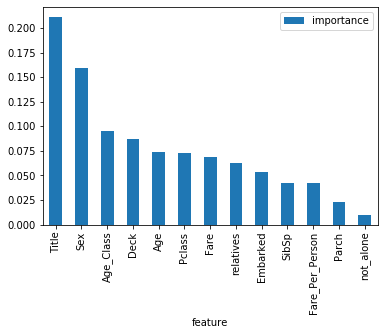

In [79]:
importances.plot.bar();

In [80]:
cols_to_drop = ["not_alone", "Parch", "SibSp", "Fare_Per_Person"]
titanic_train = titanic_train.drop(cols_to_drop, axis=1)
titanic_test = titanic_test.drop(cols_to_drop, axis=1)

In [81]:
X_train = titanic_train.drop("Survived", axis=1)
Y_train = titanic_train["Survived"]
X_test  = titanic_test.drop("PassengerId", axis=1).copy()

In [82]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

92.26

In [83]:
"Oob score:", round(random_forest.oob_score_ * 100, 2)

('Oob score:', 81.03)

In [87]:
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 16,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

0.8720538720538721

In [88]:
round(random_forest.oob_score_ * 100, 2)

83.61

In [89]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[494,  55],
       [ 99, 243]])

In [90]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
precision_score(Y_train, predictions), recall_score(Y_train, predictions), \
f1_score(Y_train, predictions), roc_auc_score(Y_train, y_scores)

(0.8154362416107382, 0.7105263157894737, 0.7593749999999999)

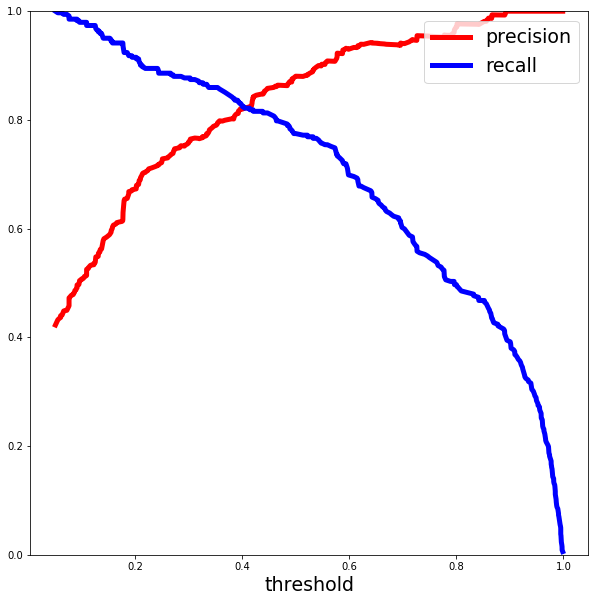

In [91]:
from sklearn.metrics import precision_recall_curve

y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:, 1]
precision, recall, threshold = precision_recall_curve(Y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b-", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])
    plt.show()
    
plt.figure(figsize=(10, 10))
plot_precision_and_recall(precision, recall, threshold)

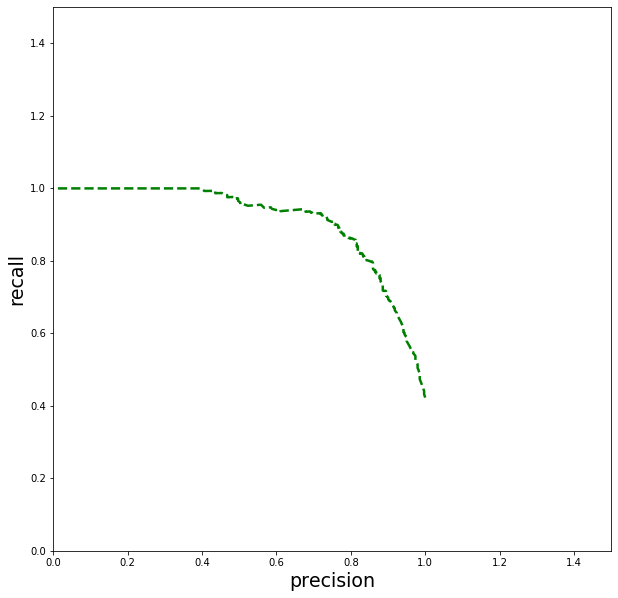

In [92]:
def plot_precision_vs_recall(precision, recall):
    plt.figure(figsize=(10, 10))
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])
    plt.show()
plt.figure(figsize=(10, 10))
plot_precision_vs_recall(precision, recall)

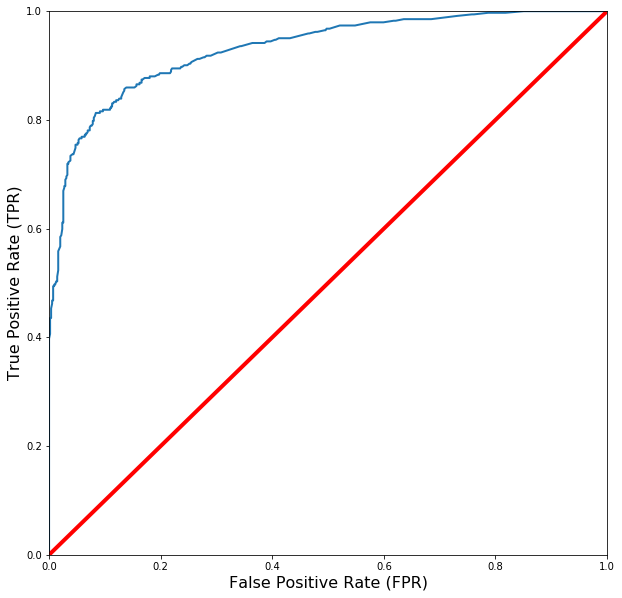

In [93]:
from sklearn.metrics import roc_curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "r", linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate (FPR)", fontsize=16)
    plt.ylabel("True Positive Rate (TPR)", fontsize=16)
    plt.show()
    
plt.figure(figsize=(10, 10))
plot_roc_curve(false_positive_rate, true_positive_rate)